# Exercise Chapter 5 
Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import random
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
import mistat

# Exercise 4

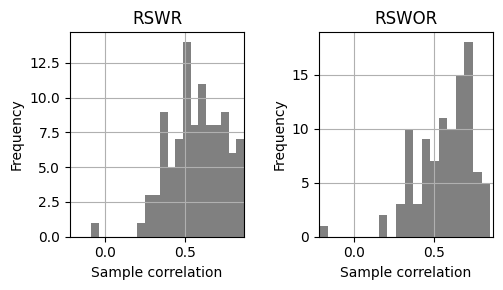

In [3]:
random.seed(1)
place = mistat.load_data('PLACE')

# calculate correlation coefficient based on a sample of rows
def stat_func(idx):
    return stats.pearsonr(place['xDev'][idx], place['yDev'][idx])[0]

rswr = []
rswor = []
idx = list(range(len(place)))
for _ in range(100):
    rswr.append(stat_func(random.choices(idx, k=20)))
    rswor.append(stat_func(random.sample(idx, k=20)))

corr_range = (min(*rswr, *rswor), max(*rswr, *rswor))

def makeHistogram(title, ax, data, xrange):
  ax = pd.Series(data).hist(color='grey', ax=ax, bins=20)
  ax.set_title(title)
  ax.set_xlabel('Sample correlation')
  ax.set_ylabel('Frequency')
  ax.set_xlim(*xrange)

fig, axes = plt.subplots(figsize=[5, 3], ncols=2)
makeHistogram('RSWR', axes[0], rswr, corr_range)
makeHistogram('RSWOR', axes[1], rswor, corr_range)
plt.tight_layout()
plt.show()

# Exercise 5

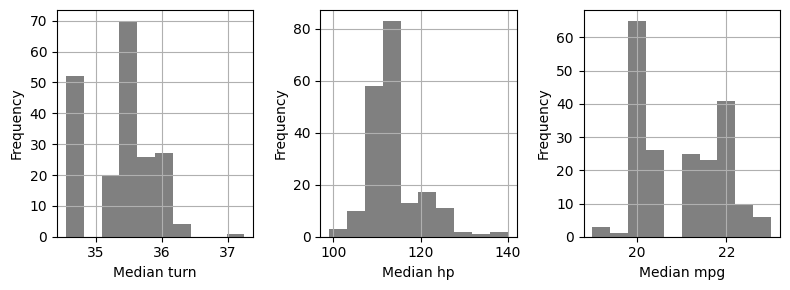

In [4]:
random.seed(1)
car = mistat.load_data('CAR')
columns = ['turn', 'hp', 'mpg']

# calculate correlation coefficient based on a sample of rows
def stat_func(idx):
    sample = car[columns].loc[idx,]
    return sample.median()

idx = list(range(len(car)))
result = []
for _ in range(200):
    result.append(stat_func(random.sample(idx, k=50)))
result = pd.DataFrame(result)

fig, axes = plt.subplots(figsize=[8, 3], ncols=3)
for ax, column in zip(axes, columns):
    result[column].hist(color='grey', ax=ax)
    ax.set_xlabel(f'Median {column}')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Exercise 8

In [5]:
# load dataset and split into strata
place = mistat.load_data('PLACE')
strata_1 = list(place['xDev'][:160])
strata_2 = list(place['xDev'][160:208])
strata_3 = list(place['xDev'][208:])
N = len(place)
w_1 = 0.385
w_2 = 0.115
w_3 = 0.5
n_1 = int(w_1 * 200)
n_2 = int(w_2 * 200)
n_3 = int(w_3 * 200)

sample_means = []
for _ in range(500):
    m_1 = np.mean(random.sample(strata_1, k=n_1))
    m_2 = np.mean(random.sample(strata_2, k=n_2))
    m_3 = np.mean(random.sample(strata_3, k=n_3))
    sample_means.append(w_1*m_1 + w_2*m_2 + w_3*m_3)
std_dev_sample_means = np.std(sample_means)
print(std_dev_sample_means)
print(stats.sem(place['xDev'], ddof=0))

3.442839155174113e-05
8.377967188860638e-05
